# 1. Logistic regression

## 1.1 Visualizing the data

In [2]:
%matplotlib inline
%xmode plain

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Decision'])
display(data.info())
data.head()

Exception reporting mode: Plain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam1       100 non-null float64
Exam2       100 non-null float64
Decision    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


None

,Exam1,Exam2,Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


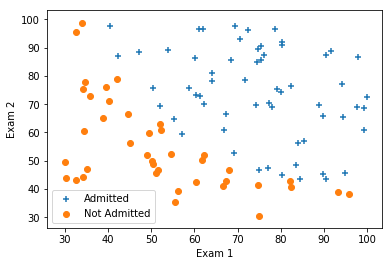

In [27]:
admitted = data[data['Decision'] == 1]
not_admitted = data[data['Decision'] == 0]

plt.scatter(admitted['Exam1'], admitted['Exam2'], marker='+', label='Admitted')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], label='Not Admitted')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend();

## 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

In [42]:
# I'll compare my implementation with scipy's
from scipy.special import expit

sigmoid = lambda x: 1 / (1 + np.exp(-x))

values = np.linspace(1, 10, 10)
    
pd.DataFrame({
    'Sigmoid': sigmoid(values),
    'Expit': expit(values)
})

,Expit,Sigmoid
0,0.731059,0.731059
1,0.880797,0.880797
2,0.952574,0.952574
3,0.982014,0.982014
4,0.993307,0.993307
5,0.997527,0.997527
6,0.999089,0.999089
7,0.999665,0.999665
8,0.999877,0.999877
9,0.999955,0.999955


### 1.2.2 Cost function and gradient

In [139]:
m, n = data[['Exam1', 'Exam2']].shape

data['Intercept'] = np.ones(m)
X = data[['Intercept', 'Exam1', 'Exam2']].values
y = data['Decision'].values.reshape(m, 1)

initial_theta = np.zeros(n + 1).reshape(n + 1, 1)

In [149]:
from numpy import log

def cost_function(theta, X, y):
    J = (1 / m) * (
        -y * log(sigmoid(X.dot(theta))) - 
        (1 - y) * log((1 - sigmoid(X.dot(theta))))
    ).sum()

    grad = (1 / m) * ((sigmoid(X.dot(theta)) - y) * X).sum(axis=0)
    return J, grad

J, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta: {:.3f}'.format(J))
grad

Cost at initial theta: 0.693


array([ -0.1       , -12.00921659, -11.26284221])

In [141]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(n + 1, 1)
J, grad = cost_function(test_theta, X, y)
print('Cost at test theta: {:.3f}'.format(J))
grad

Cost at test theta: 0.218


array([ 0.04290299,  2.56623412,  2.64679737])

### 1.2.3 Learning parameters using `minimize`

In [152]:
from scipy.optimize import minimize

# Theta needs to be reshaped because minimize passes in a 1D array and cost_function expects a column vector
# jac=True means that cost_function also returns the Jacobian matrix (gradient)
res = minimize(lambda theta: cost_function(theta.reshape(n + 1, 1), X, y), initial_theta, jac=True)
# Note that despite the scary divide-by-zero warning, the optimizer succeeds

print("Cost at theta found by minimize: {:.3f}".format(res.fun))
res.x

Cost at theta found by minimize: 0.203


C:\Users\jack_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\jack_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


array([-25.16133284,   0.2062317 ,   0.2014716 ])

### 1.2.4 Evaluating logistic regression

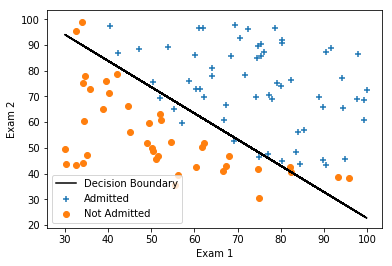

In [164]:
theta = res.x

x = X[:, 1]
boundary = lambda x: (theta[0] + theta[1] * x) /  - theta[2]

plt.scatter(admitted['Exam1'], admitted['Exam2'], marker='+', label='Admitted')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], label='Not Admitted')
plt.plot(x, boundary(x), color='black', label='Decision Boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend();

In [166]:
p = sigmoid(np.array([1, 45, 85]).dot(theta))
print("Probability is {:.3f}".format(p))

Probability is 0.776


In [180]:
def predict(theta, X):
    return sigmoid(X.dot(theta)) > 0.5

prediction = predict(theta, X)
ground_truth = (y == True).flatten()
np.sum(prediction == ground_truth)

89

# 2. Regularized logistic regression